# Hackathons Competition

## Problem Description

### Goal
The goal of the problem is to predict whether a passenger was satisfied or not based on their overall experience of traveling on the Shinkansen Bullet Train.

### Dataset
The problem involves two separate datasets:
- **Travel Data:** Contains information related to passengers and attributes of the Shinkansen train they traveled on.
- **Survey Data:** Aggregated surveys indicating the post-service experience.

Both datasets are provided as raw data and may require data cleaning and validation steps.

#### Data Split
The data has been split into two groups and provided in the Dataset folder:
- Train_Data
- Test_Data

### Target Variable
- **Overall_Experience:** Binary variable
  - 1: Satisfied
  - 0: Not Satisfied

The training set contains labels for the target column (Overall_Experience). The testing set will be used to evaluate the model's performance on unseen data, predicting the Overall_Experience for each participant.

### Data Dictionary
All data is self-explanatory, and additional details about survey levels are provided in the Data Dictionary file.

### Submission File Format
Submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns:
- ID
- Overall_Experience (0 or 1)

### Evaluation Criteria
- **Accuracy Score:** Percentage of correct predictions.
  - Accuracy = (True Positives + True Negatives) / Total observations

The accuracy score measures the model's ability to correctly predict Overall_Experience. The best possible accuracy is 100% (or 1), indicating all predictions are correct, while the worst accuracy is 0%, indicating none of the predictions are correct.
none of the predictions are correct.


In [306]:
pip install featuretools

Note: you may need to restart the kernel to use updated packages.


In [314]:
# Importing neccessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
import plotly.express as px

# Splitting the data
# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 30)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

In [315]:
# Loading Train_Datsets and merging them
df_train_1 = pd.read_csv("C:/Users/claud/Documents/Machine learning MIT/Hackathons/Train_Data/Surveydata_train.csv")
df_train_2 = pd.read_csv("C:/Users/claud/Documents/Machine learning MIT/Hackathons/Train_Data/Traveldata_train.csv")
df_train = pd.merge(df_train_1, df_train_2, on='ID', how='inner')


# Loading Test_Datsets and merging them
df_test_1 = pd.read_csv("C:/Users/claud/Documents/Machine learning MIT/Hackathons/Test_Data/Surveydata_test.csv")
df_test_2 = pd.read_csv("C:/Users/claud/Documents/Machine learning MIT/Hackathons/Test_Data/Traveldata_test.csv")
df2 = pd.merge(df_test_1, df_test_2, on='ID', how='inner')
Sample_Submission = pd.read_csv("C:/Users/claud/Documents\Machine learning MIT/Hackathons/Sample_Submission.csv")
submission = Sample_Submission.ID
data_test = pd.merge(df2, submission, on='ID', how='inner')
df_test = data_test.copy()

In [316]:
df_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [317]:
# Lets explore test data set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_Time_Convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_Location        35590 non-null  object 
 6   Onboard_Wifi_Service     35590 non-null  object 
 7   Onboard_Entertainment    35594 non-null  object 
 8   Online_Support           35576 non-null  object 
 9   Ease_of_Online_Booking   35584 non-null  object 
 10  Onboard_Service          32730 non-null  object 
 11  Legroom                  35577 non-null  object 
 12  Baggage_Handling         35562 non-null  object 
 13  CheckIn_Service          35580 non-null  object 
 14  Cleanliness           

In [318]:
df_test.isnull().sum()/df_test.shape[0] * 100

ID                         0.000000
Seat_Comfort               0.061794
Seat_Class                 0.000000
Arrival_Time_Convenient    9.339363
Catering                   9.429246
Platform_Location          0.033706
Onboard_Wifi_Service       0.033706
Onboard_Entertainment      0.022471
Online_Support             0.073030
Ease_of_Online_Booking     0.050559
Onboard_Service            8.066963
Legroom                    0.070221
Baggage_Handling           0.112353
CheckIn_Service            0.061794
Cleanliness                0.005618
Online_Boarding            0.005618
Gender                     0.084265
Customer_Type              9.502275
Age                        0.030897
Type_Travel                9.684849
Travel_Class               0.000000
Travel_Distance            0.000000
Departure_Delay_in_Mins    0.081456
Arrival_Delay_in_Mins      0.345486
dtype: float64

##### There are a lot of missing values. To handle it,I will drop columns with a large percentage of missing value and treat the remaining.

In [319]:
# Deleting value with high percentage of missing values and inpute mean or mode for categoricals or numericals feature
columns_to_drop = ['Arrival_Time_Convenient', 'Catering', 'Onboard_Service', 'Customer_Type', 'Type_Travel']
df_test.drop(columns=columns_to_drop, inplace=True)

# Imputing categorical features
ctg_col_to_impute = df_test.select_dtypes(include='object').columns
for col in ctg_col_to_impute:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

# Imputing numerical features

num_col_to_impute = df_test.select_dtypes(include='number').columns
num_col_to_impute = [col for col in num_col_to_impute if col != 'ID']
df_test[num_col_to_impute] = df_test[num_col_to_impute].apply(lambda x: x.fillna(x.mean()))


In [321]:
df_test.isnull().sum()

ID                         0
Seat_Comfort               0
Seat_Class                 0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Age                        0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [322]:
df_test.shape

(35602, 19)

In [323]:
# Printing the % sub categories of each category
for i in ctg_col_to_impute:
    print(df_test[i].value_counts(normalize=True))
    print('*'*40)

Seat_Comfort
Acceptable           0.225409
Needs Improvement    0.219960
Good                 0.219314
Poor                 0.161648
Excellent            0.136341
Extremely Poor       0.037329
Name: proportion, dtype: float64
****************************************
Seat_Class
Ordinary     0.501657
Green Car    0.498343
Name: proportion, dtype: float64
****************************************
Platform_Location
Manageable           0.263356
Convenient           0.229706
Needs Improvement    0.188276
Inconvenient         0.172294
Very Convenient      0.146368
Name: proportion, dtype: float64
****************************************
Onboard_Wifi_Service
Good                 0.245913
Excellent            0.221195
Acceptable           0.210522
Needs Improvement    0.209426
Poor                 0.111791
Extremely Poor       0.001152
Name: proportion, dtype: float64
****************************************
Onboard_Entertainment
Good                 0.321443
Excellent            0.230436
Accep

In [324]:
# Basic categorical statistics for test data
df_test.describe(include='object')

,Seat_Comfort,Seat_Class,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Travel_Class
count,35602,35602,35602,35602,35602,35602,35602,35602,35602,35602,35602,35602,35602,35602
unique,6,2,5,6,6,5,6,6,5,5,5,6,2,2
top,Acceptable,Ordinary,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Female,Eco
freq,8025,17860,9376,8755,11444,11513,11043,10867,13331,10004,13423,9682,18099,18473


In [325]:
# Basic numeric statstic for test data
df_test.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,3.560200e+04,35602.000000,35602.000000,35602.000000,35602.000000
mean,9.991780e+07,39.446995,1987.151761,14.880696,15.308802
std,1.027756e+04,15.135215,1024.308863,37.880016,38.464673
min,9.990000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.990890e+07,27.000000,1360.000000,0.000000,0.000000
50%,9.991780e+07,40.000000,1929.000000,0.000000,0.000000
75%,9.992670e+07,51.000000,2559.000000,13.000000,13.000000
max,9.993560e+07,85.000000,6868.000000,978.000000,970.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Travel_Distance'}>],
       [<Axes: title={'center': 'Departure_Delay_in_Mins'}>,
        <Axes: title={'center': 'Arrival_Delay_in_Mins'}>]], dtype=object)

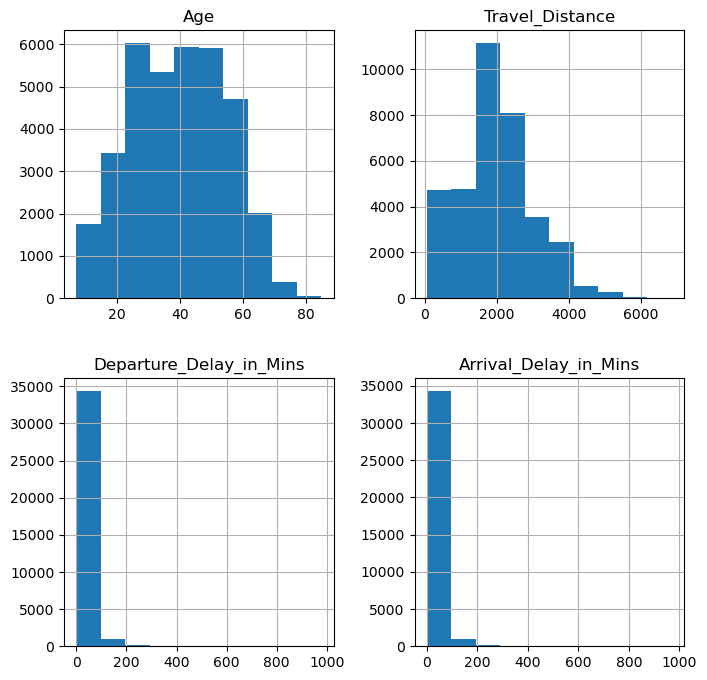

In [326]:
# Univariate analysis for numeric feature 
df_test[num_col_to_impute].hist(figsize=(8,8))

In [327]:
df_test.select_dtypes(include='object').columns

Index(['Seat_Comfort', 'Seat_Class', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
       'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender',
       'Travel_Class'],
      dtype='object')

In [328]:
# Encode categorical features

to_encode = ['Seat_Comfort', 'Seat_Class', 'Platform_Location',
             'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
             'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
             'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender',
             'Travel_Class']

# Initialiser les encodeurs
label_encoders = {}

# Appliquer les encodeurs aux données de test
for col in to_encode:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])
    label_encoders[col] = le  # Sauvegarder l'encodeur pour une utilisation ultérieure

# Sauvegarder les encodeurs pour une utilisation ultérieure sur les données d'entraînement
#joblib.dump(label_encoders, 'label_encoders.pkl')  # Sauvegarder les encodeurs dans un fichier
df_test.head()

,ID,Seat_Comfort,Seat_Class,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Age,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,0,0,2,4,1,2,1,1,1,2,1,5,0,36.0,0,532,0.0,0.0
1,99900002,2,1,2,0,5,0,0,0,2,0,1,0,0,21.0,0,1425,9.0,28.0
2,99900003,1,1,4,1,1,1,4,4,3,2,3,1,1,60.0,0,2832,0.0,0.0
3,99900004,0,0,4,5,0,1,5,4,1,1,1,5,0,29.0,1,1352,0.0,0.0
4,99900005,1,1,3,1,1,1,1,0,1,1,1,1,1,18.0,0,1610,17.0,0.0


In [329]:
# Dropping ID column
df_test.drop(columns='ID', inplace=True, axis=0)


In [330]:
# Now lets analyse train dataset
df_test.head(2)

,Seat_Comfort,Seat_Class,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Age,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,0,0,2,4,1,2,1,1,1,2,1,5,0,36.0,0,532,0.0,0.0
1,2,1,2,0,5,0,0,0,2,0,1,0,0,21.0,0,1425,9.0,28.0


In [331]:
# Checking Infos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

In [332]:
# Checking missing values in percentage
df_train.isnull().sum()/df_train.shape[0] * 100

ID                         0.000000
Overall_Experience         0.000000
Seat_Comfort               0.064633
Seat_Class                 0.000000
Arrival_Time_Convenient    9.461851
Catering                   9.261594
Platform_Location          0.031787
Onboard_Wifi_Service       0.031787
Onboard_Entertainment      0.019072
Online_Support             0.096420
Ease_of_Online_Booking     0.077348
Onboard_Service            8.053698
Legroom                    0.095360
Baggage_Handling           0.150457
CheckIn_Service            0.081586
Cleanliness                0.006357
Online_Boarding            0.006357
Gender                     0.081586
Customer_Type              9.484101
Age                        0.034965
Type_Travel                9.775480
Travel_Class               0.000000
Travel_Distance            0.000000
Departure_Delay_in_Mins    0.060395
Arrival_Delay_in_Mins      0.378262
dtype: float64

In [333]:
# Checking duplicate rows
df_train.duplicated().sum()

0

In [334]:
# Checking unique values
df_train.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

In [335]:
df_train.dropna(inplace=True, axis=0) # Dropping all rows with null value
to_drop = ['ID', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Service', 'Customer_Type', 'Type_Travel']
df_train.drop(columns= to_drop, inplace=True)
df_train.drop_duplicates(inplace=True) # Dropping all duplicate rows
df_train.isnull().sum() #Checking back missing rows

Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Age                        0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [336]:
df_train.duplicated().sum()

0

In [337]:
df_train.sample(10)

,Overall_Experience,Seat_Comfort,Seat_Class,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Age,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
73377,0,Acceptable,Green Car,Very Convenient,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Good,Needs Improvement,Male,44.0,Eco,1699,0.0,0.0
31432,0,Poor,Ordinary,Convenient,Acceptable,Good,Acceptable,Acceptable,Acceptable,Poor,Good,Acceptable,Acceptable,Female,39.0,Business,136,0.0,43.0
66891,1,Acceptable,Ordinary,Manageable,Poor,Good,Acceptable,Good,Good,Good,Excellent,Good,Needs Improvement,Male,43.0,Business,2317,0.0,0.0
16342,1,Excellent,Ordinary,Very Convenient,Excellent,Excellent,Excellent,Excellent,Good,Good,Acceptable,Excellent,Excellent,Female,69.0,Eco,2261,21.0,0.0
58973,1,Excellent,Ordinary,Very Convenient,Good,Excellent,Good,Good,Excellent,Excellent,Acceptable,Excellent,Good,Female,23.0,Business,1233,0.0,0.0
79937,1,Excellent,Green Car,Manageable,Needs Improvement,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Female,39.0,Eco,2074,0.0,0.0
13408,1,Extremely Poor,Green Car,Convenient,Acceptable,Extremely Poor,Acceptable,Acceptable,Good,Good,Good,Good,Acceptable,Female,22.0,Eco,1910,0.0,0.0
89268,0,Acceptable,Ordinary,Needs Improvement,Acceptable,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Poor,Acceptable,Acceptable,Male,16.0,Eco,2316,9.0,3.0
4123,0,Acceptable,Green Car,Convenient,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Acceptable,Acceptable,Male,56.0,Eco,1895,0.0,0.0
6880,1,Poor,Green Car,Inconvenient,Excellent,Excellent,Excellent,Good,Good,Good,Acceptable,Good,Good,Male,59.0,Business,2959,33.0,44.0


In [338]:
df_train.shape

(55487, 19)

In [339]:
# summary statistic of categorical features
df_train.describe(include=object)

,Seat_Comfort,Seat_Class,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Travel_Class
count,55487,55487,55487,55487,55487,55487,55487,55487,55487,55487,55487,55487,55487,55487
unique,6,2,6,6,6,5,6,6,5,5,6,6,2,2
top,Needs Improvement,Green Car,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Female,Eco
freq,12401,27934,14280,13474,17926,17692,17069,16993,20717,15594,20883,15061,28240,29127


In [340]:
# Summary statistic of numeric columns
df_train.describe()

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,55487.000000,55487.000000,55487.000000,55487.000000,55487.000000
mean,0.546921,39.405627,1979.236127,14.787950,15.204733
std,0.497798,15.084095,1030.615661,37.996852,38.430183
min,0.000000,7.000000,50.000000,0.000000,0.000000
25%,0.000000,27.000000,1357.000000,0.000000,0.000000
50%,1.000000,40.000000,1920.000000,0.000000,0.000000
75%,1.000000,51.000000,2535.000000,12.000000,13.000000
max,1.000000,85.000000,6950.000000,1017.000000,1011.000000


In [341]:
# Selecting categorical features and numeric features
df_ctg = df_train.select_dtypes(include= object).columns
df_num = df_train.select_dtypes(include= 'number').columns
df_ctg

Index(['Seat_Comfort', 'Seat_Class', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
       'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender',
       'Travel_Class'],
      dtype='object')

<Axes: >

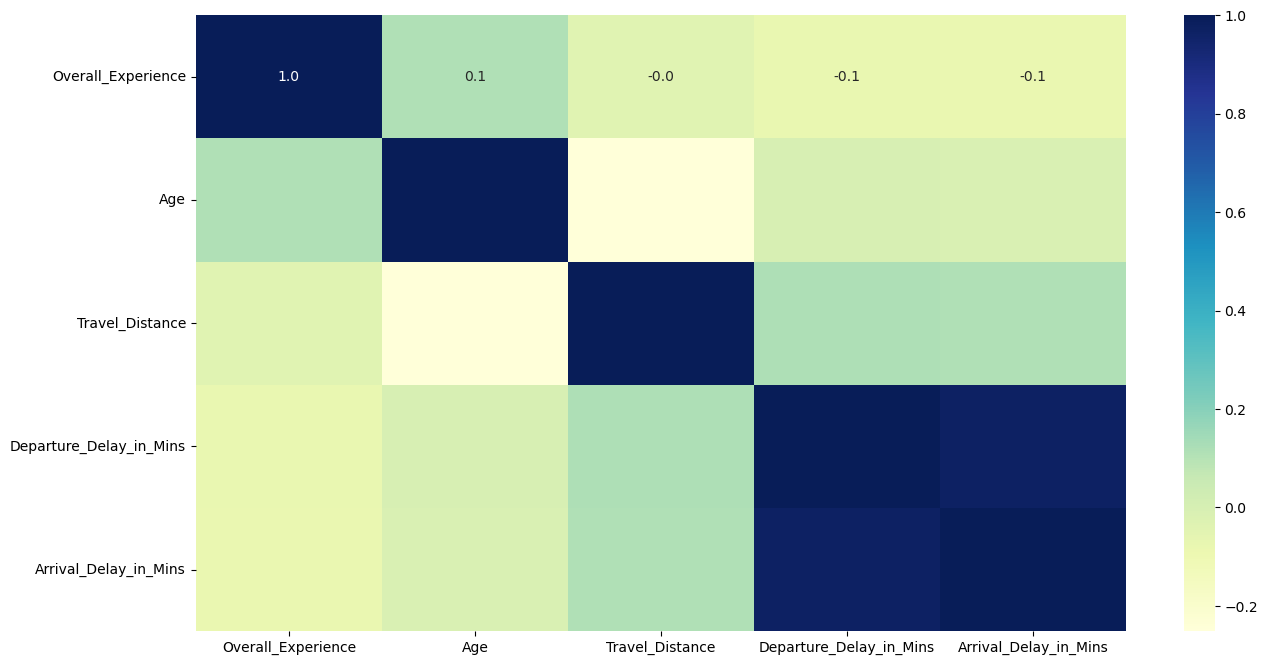

In [342]:
# Correlation of numerical feature
plt.figure(figsize=(15,8))
sns.heatmap(df_train[df_num].corr(),annot=True, fmt='0.1f', cmap='YlGnBu')

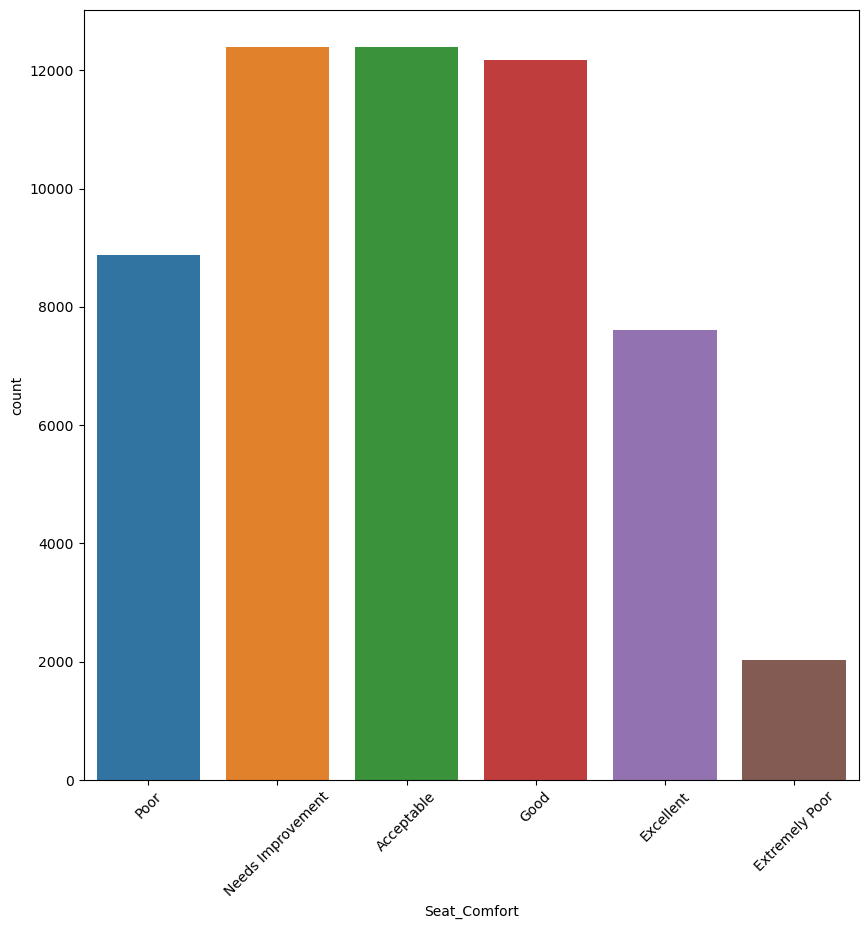

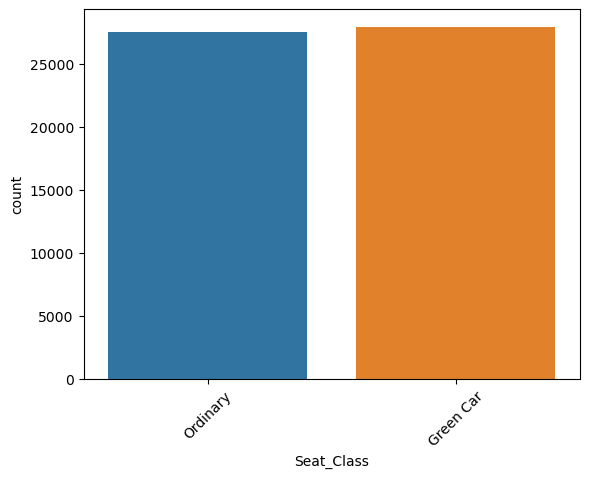

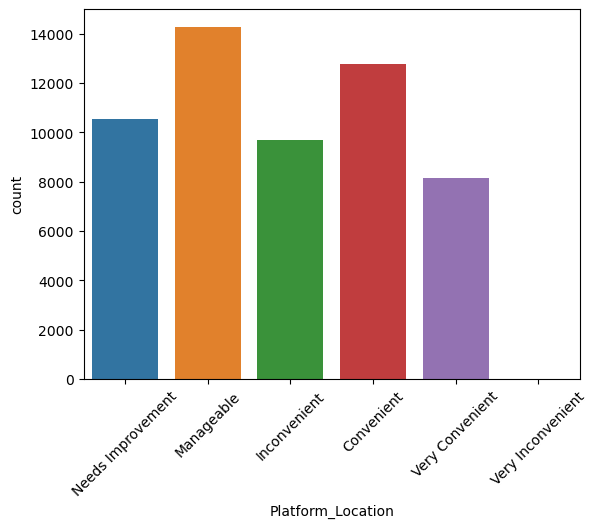

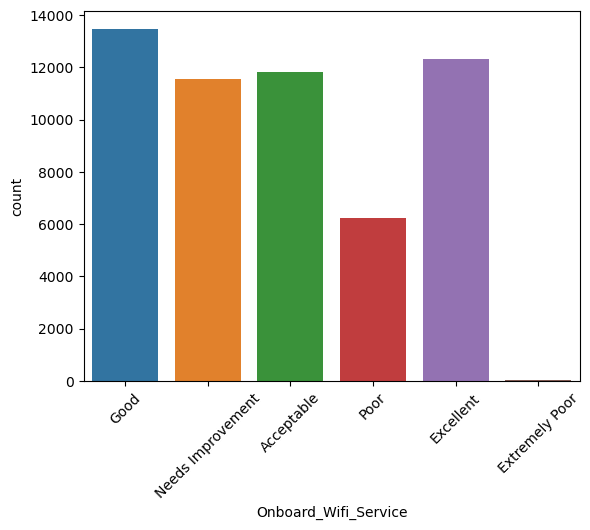

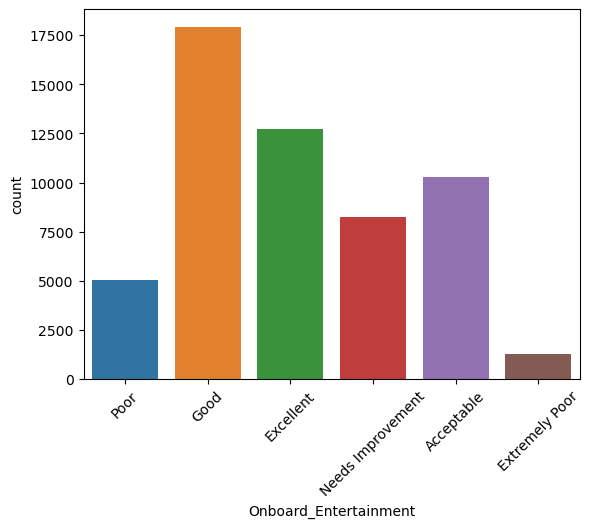

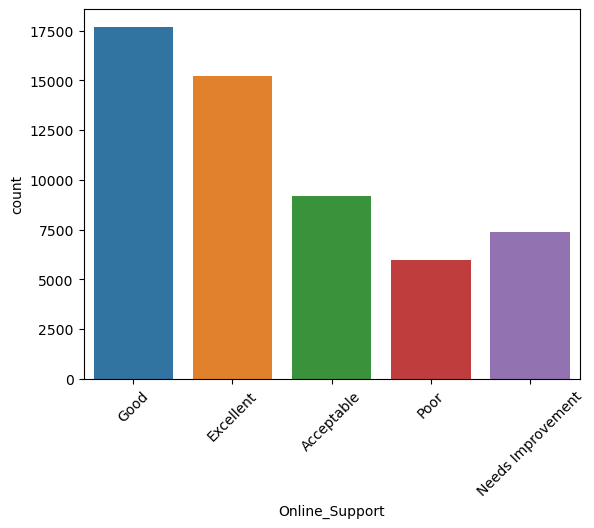

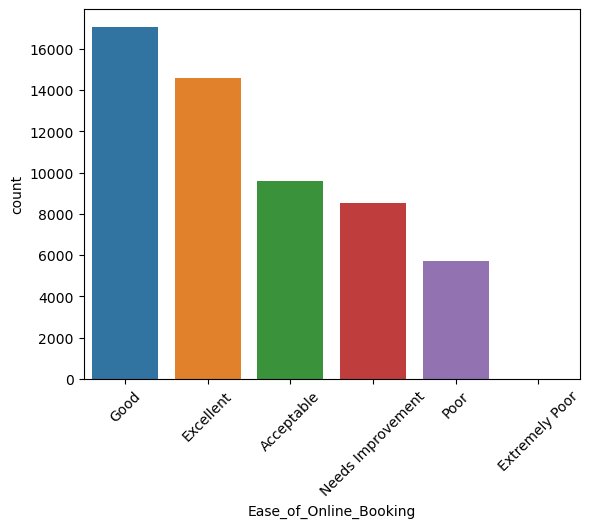

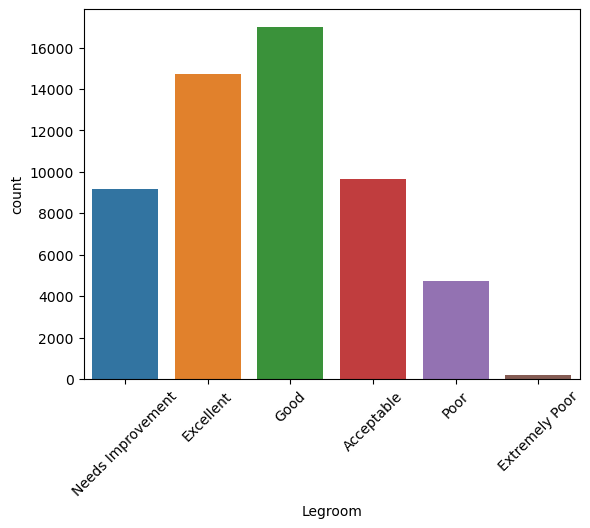

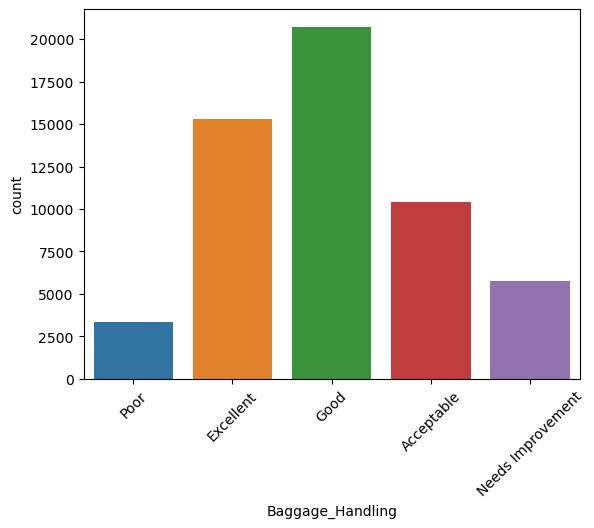

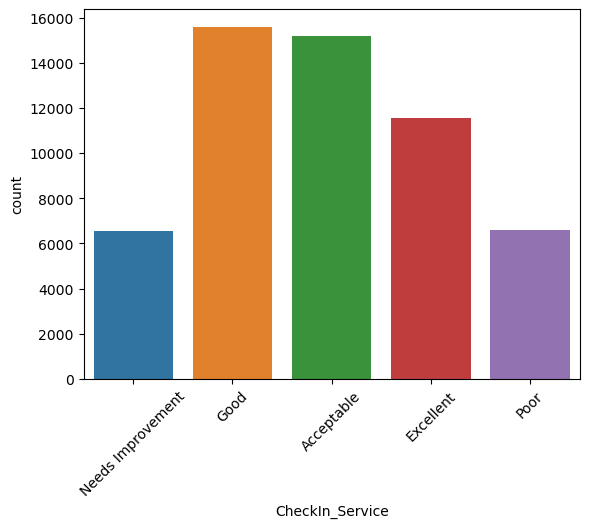

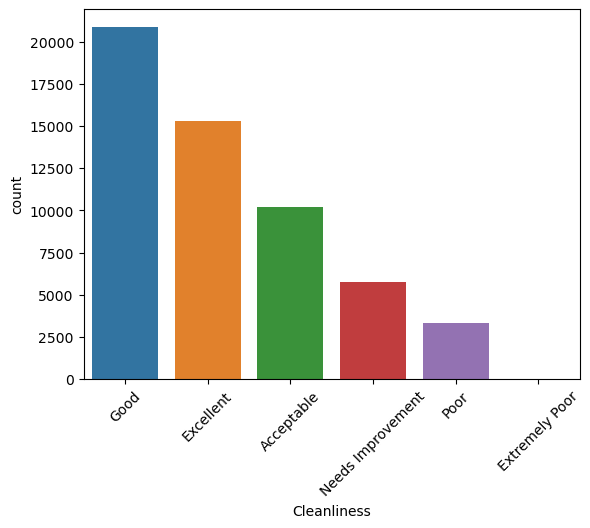

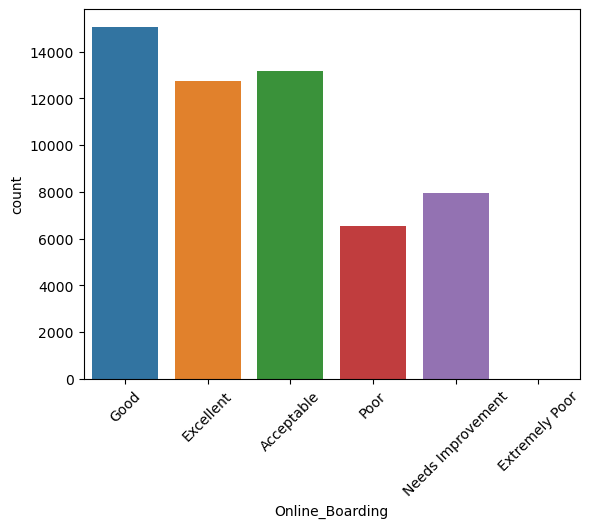

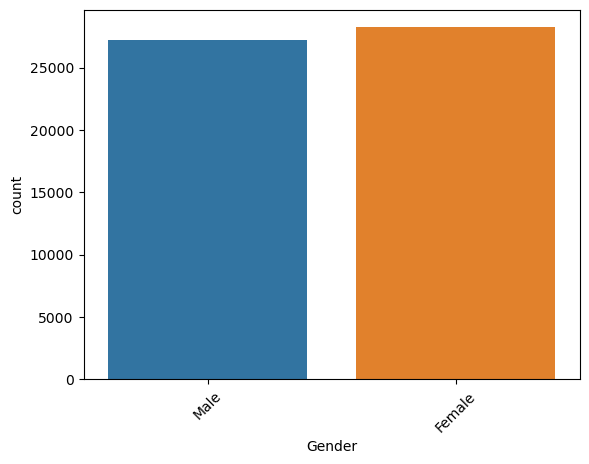

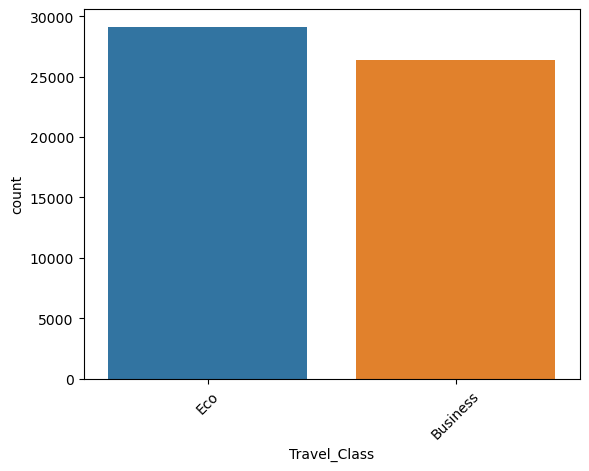

In [343]:
# Univariate analysis for categorical features

plt.figure(figsize=(10,10))
for i in df_ctg:
    sns.countplot(data=df_train, x = i)
    plt.xticks(rotation = 45)
    plt.show()

In [344]:
# Printing the % sub categories of each category
for i in df_ctg:
    print(df_train[i].value_counts(normalize=True))
    print('*'*40)

Seat_Comfort
Needs Improvement    0.223494
Acceptable           0.223386
Good                 0.219367
Poor                 0.160110
Excellent            0.137041
Extremely Poor       0.036603
Name: proportion, dtype: float64
****************************************
Seat_Class
Green Car    0.503433
Ordinary     0.496567
Name: proportion, dtype: float64
****************************************
Platform_Location
Manageable           0.257358
Convenient           0.230577
Needs Improvement    0.190063
Inconvenient         0.174888
Very Convenient      0.147079
Very Inconvenient    0.000036
Name: proportion, dtype: float64
****************************************
Onboard_Wifi_Service
Good                 0.242832
Excellent            0.221746
Acceptable           0.213239
Needs Improvement    0.208589
Poor                 0.112657
Extremely Poor       0.000937
Name: proportion, dtype: float64
****************************************
Onboard_Entertainment
Good                 0.323067
Excel

array([[<Axes: title={'center': 'Overall_Experience'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Travel_Distance'}>,
        <Axes: title={'center': 'Departure_Delay_in_Mins'}>],
       [<Axes: title={'center': 'Arrival_Delay_in_Mins'}>, <Axes: >]],
      dtype=object)

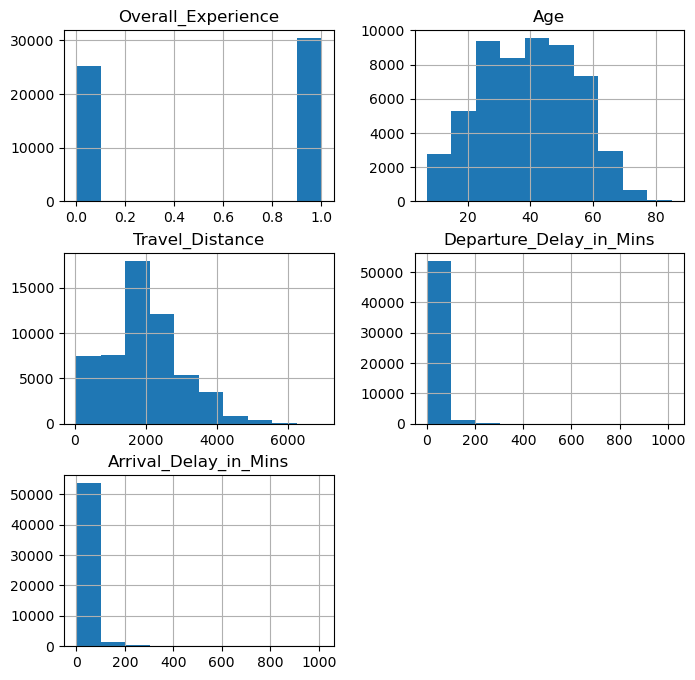

In [345]:
# Univariate analysis for numeric feature 
df_train[df_num].hist(figsize=(8,8))

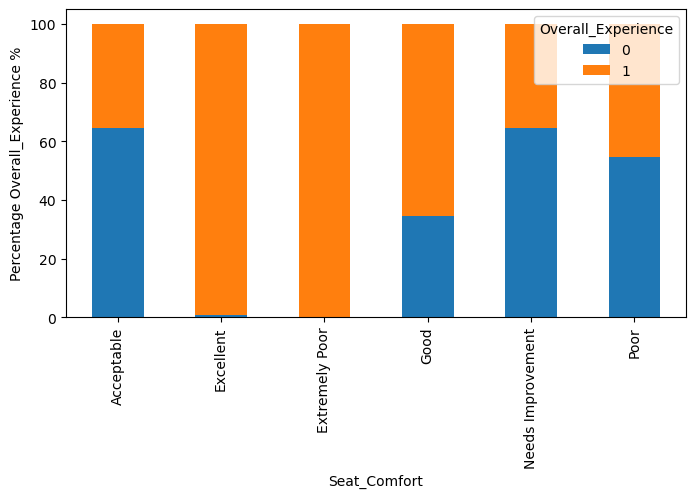

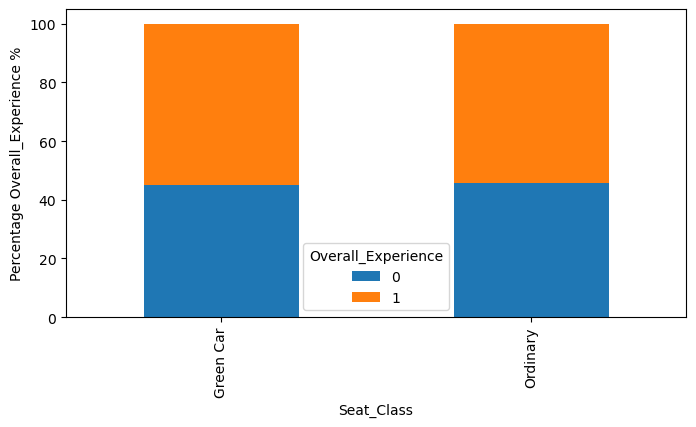

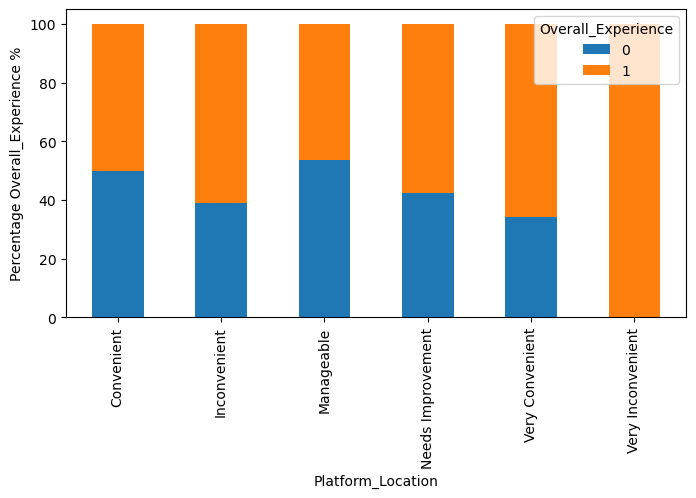

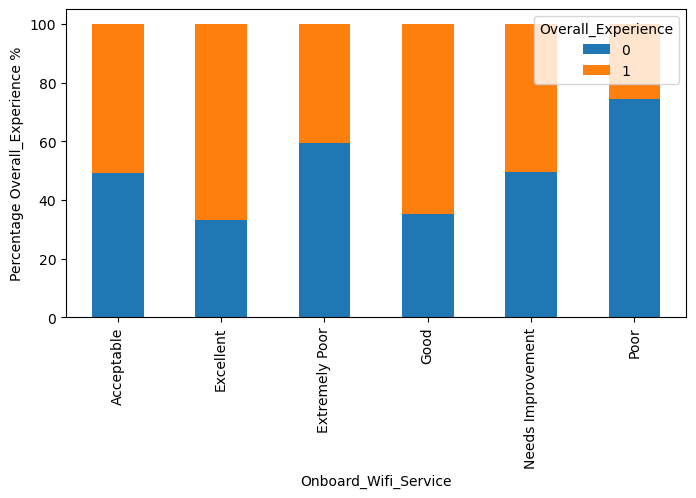

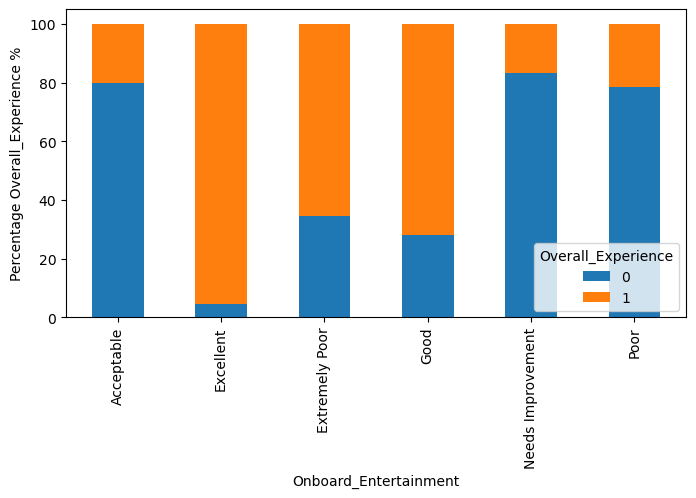

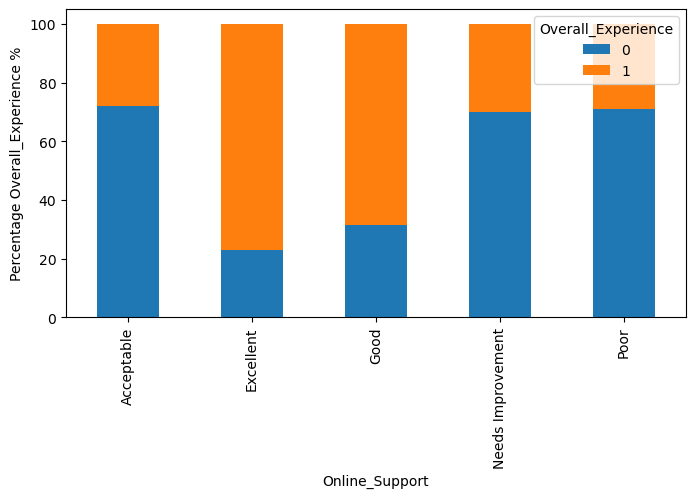

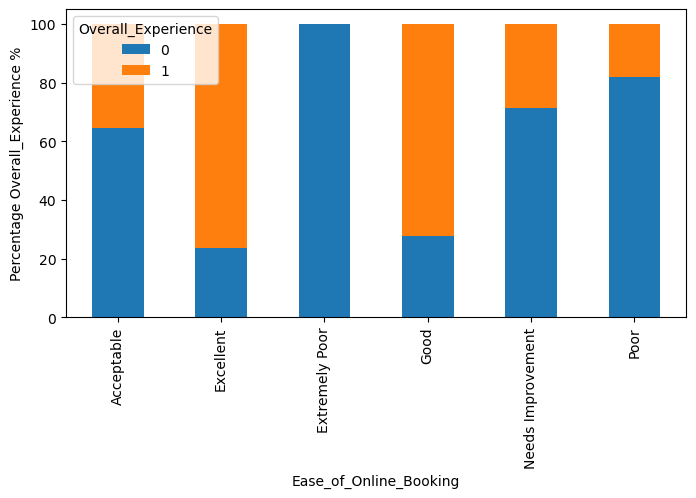

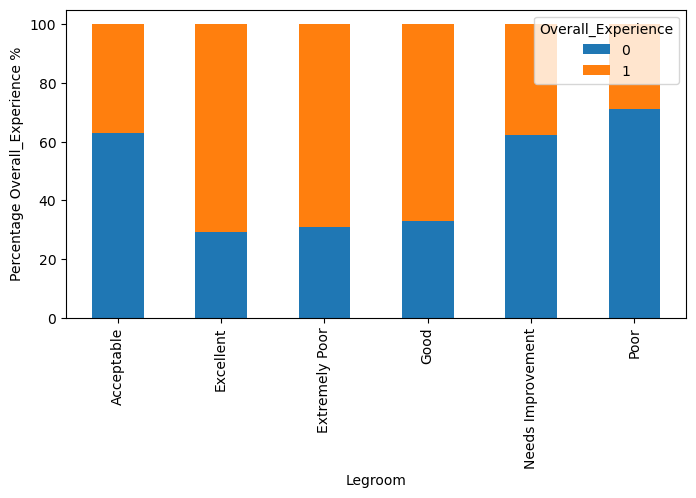

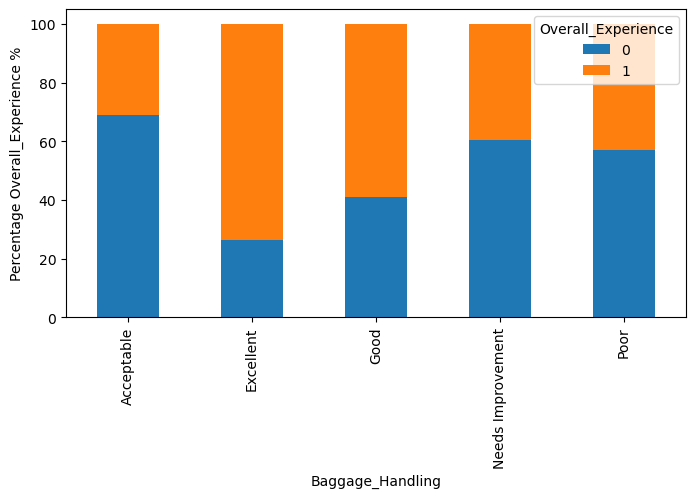

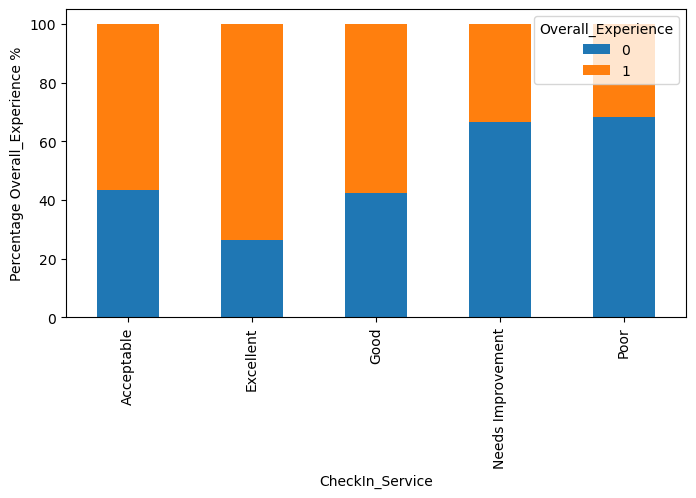

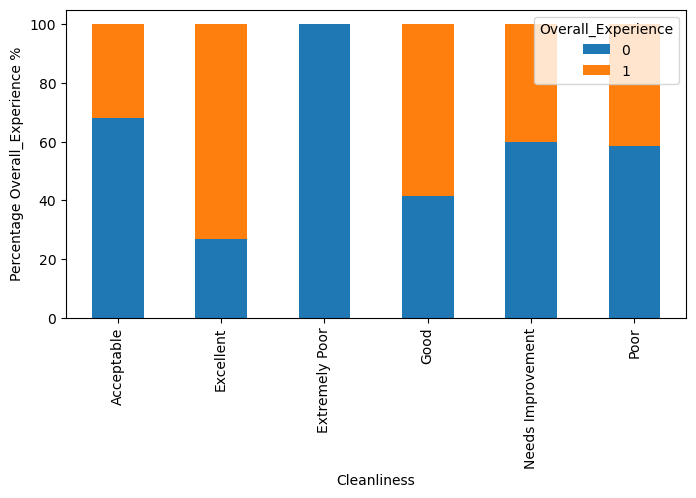

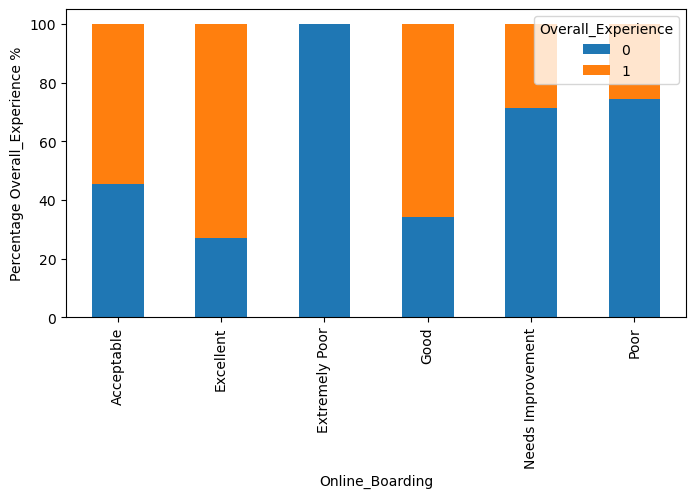

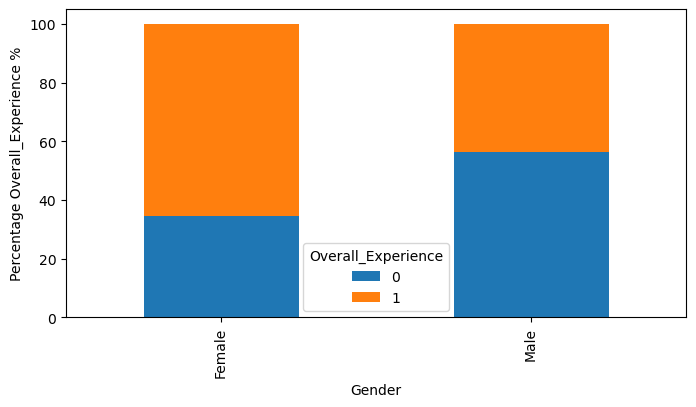

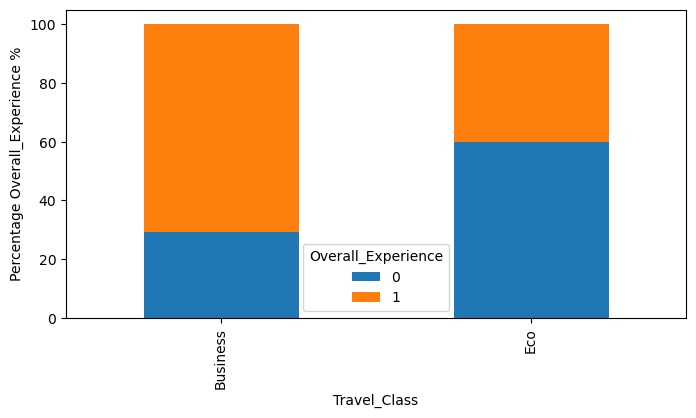

In [346]:
# Bivariate Analysis
for i in df_ctg:
    if i!='Overall_Experience':
        (pd.crosstab(df_train[i],df_train['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Overall_Experience %')

In [347]:
# Relation betwen dependant variable (overall_experience) and independants features
df_train.groupby(['Overall_Experience'])[['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']].mean()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Overall_Experience,,,,
0,37.504972,2024.687947,18.023548,18.731782
1,40.980163,1941.583023,12.107523,12.282862


In [348]:
# Encode categorical features

to_encode = ['Seat_Comfort', 'Seat_Class', 'Platform_Location',
             'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
             'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
             'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender',
             'Travel_Class']

# Initialiser les encodeurs
label_encoders = {}

# Appliquer les encodeurs aux données de test
for col in to_encode:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le  # Sauvegarder l'encodeur pour une utilisation ultérieure

In [349]:
df_train.head(2)

,Overall_Experience,Seat_Comfort,Seat_Class,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Age,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
1,0,5,1,3,3,5,2,3,4,4,3,3,3,1,48.0,1,2200,9.0,0.0
2,1,4,0,3,4,3,1,1,1,1,2,1,1,0,43.0,0,1061,77.0,119.0


In [350]:
# Separate dependant and independants features
Y_train= df_train.Overall_Experience
X_train= df_train.drop(columns = ['Overall_Experience'])
X_train.head()

,Seat_Comfort,Seat_Class,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Age,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
1,5,1,3,3,5,2,3,4,4,3,3,3,1,48.0,1,2200,9.0,0.0
2,4,0,3,4,3,1,1,1,1,2,1,1,0,43.0,0,1061,77.0,119.0
4,0,1,2,4,3,1,3,3,2,2,3,3,0,50.0,0,1981,0.0,0.0
5,4,1,3,3,1,2,0,3,0,0,0,0,1,44.0,0,2810,0.0,0.0
6,3,0,1,3,3,2,3,1,3,1,0,3,1,56.0,1,2029,0.0,0.0


In [351]:
# Fitting the Random Forest classifier on the training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
#rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [352]:
# Prédiction sur les données d'entraînement
y_pred_train_rf = rf_classifier.predict(X_train)

# Évaluation des performances (par exemple, précision)
accuracy = accuracy_score(Y_train, y_pred_train_rf) # As mentionned above we will just use accuracy to measure performance.
print(f'Accuracy on training data: {accuracy:.2f}')

Accuracy on training data: 1.00


In [353]:
# Define the model
prune_model = DecisionTreeClassifier(random_state=1)

# Define the grid of parameters
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create the GridSearchCV object with 'accuracy' as the scoring metric
grid_search = GridSearchCV(estimator=prune_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print(f"Best parameters are {grid_search.best_params_} with CV score={grid_search.best_score_:.2f}")

# Make predictions with the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the training set
Y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

print(f"Accuracy on train set: {train_accuracy:.2f}")

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits
Best parameters are {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 15} with CV score=0.92
Accuracy on train set: 0.95


In [354]:
X_train.columns

Index(['Seat_Comfort', 'Seat_Class', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
       'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender', 'Age',
       'Travel_Class', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

In [355]:
df_test.columns

Index(['Seat_Comfort', 'Seat_Class', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
       'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender', 'Age',
       'Travel_Class', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

In [356]:
y_test_pred = best_model.predict(df_test)

In [357]:
ID_column = data_test['ID']  

data = pd.DataFrame({
    'ID': ID_column,
    'Overall_Experience': y_test_pred  # Replace 'Overall_Experience' with the desired column name for predictions
})

In [358]:
data.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [359]:
# saving file 
data.to_csv('final_data.csv', index=False) 

In [ ]:
# Serialize to a pickle file
with open('final_data.pkl', 'wb') as file:
    pickle.dump(data, file)